## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

import nltk                               
import matplotlib.pyplot as plt           
import random  

import re                                
import string                            

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer       
from nltk.tokenize import TweetTokenizer

## Loading Datasets

In [2]:
df_train = pd.read_csv('C:/Users/ZASHANK/Downloads/nlp-getting-started/train.csv')

In [3]:
df_test = pd.read_csv('C:/Users/ZASHANK/Downloads/nlp-getting-started/test.csv')

In [4]:
# Diplaying top 5 records of train and test data
print('Train Data:\n',df_train.head(5))
print(100*'=')
print('Test Data:\n',df_test.head(5))

Train Data:
    id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Test Data:
    id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Tai

In [5]:
# Shape of Train and Test data
print('Train Shape:\n',df_train.shape)
print(100*'=')
print('Test Shape:\n',df_test.shape)

Train Shape:
 (7613, 5)
Test Shape:
 (3263, 4)


In [6]:
# Getting info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

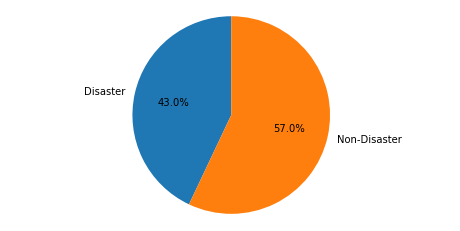

In [8]:
# Plotting a Pie Chart for the disaster and non-disaster tweets
fig,plot = plt.subplots(figsize = (8,4))
labels = ['Disaster','Non-Disaster']
plot.pie((df_train[df_train['target']==1].shape[0],df_train[df_train['target']==0].shape[0]),labels = labels,autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.axis('equal')
plt.show()

In [9]:
# Converting all the string to the lower case letter
#df_train.str.lower()
df_train['text'].apply(lambda x: x.lower())

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

In [10]:
df_test['text'].apply(lambda x: x.lower())

0                      just happened a terrible car crash
1       heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                apocalypse lighting. #spokane #wildfires
4           typhoon soudelor kills 28 in china and taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm in ri worse than last hurricane. my city...
3260    green line derailment in chicago http://t.co/u...
3261    meg issues hazardous weather outlook (hwo) htt...
3262    #cityofcalgary has activated its municipal eme...
Name: text, Length: 3263, dtype: object

## Preprocessing


### Removing punctuations
If we did not remove punctuation then punctuation is also considered one word for this situation we remove punctuation.

In [11]:
import string,time
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
        return text

In [12]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
df_train['text'] = df_train.loc[:,'text'].apply(lambda x : remove_punc(x))

### Remove Hashsign "#"

In [14]:
df_train['text'] = df_train.loc[:,'text'].apply(lambda x : re.sub(r'#','',x))
df_train['text'].head()

0    Our Deeds are the Reason of this earthquake Ma...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive wildfires evacuation ord...
4    Just got sent this photo from Ruby Alaska as s...
Name: text, dtype: object

### Remove Hyperlinks

In [15]:
df_train['text'] = df_train.loc[:,'text'].apply(lambda x : re.sub(r'https?:\/\/.*[\r\n]*','',x))

### Remove old style retweet text "RT"

In [16]:
df_train['text'] = df_train.loc[:,'text'].apply(lambda x : re.sub(r'^RT[\s]+', '', x))

### Tokenizing the text

In [17]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
df_train['text'] = df_train.loc[:,'text'].apply(lambda x: tokenizer.tokenize(x))

In [18]:
df_train['text'].head(5)

0    [our, deeds, are, the, reason, of, this, earth...
1     [forest, fire, near, la, ronge, sask, ., canada]
2    [all, residents, asked, to, ', shelter, in, pl...
3    [13,000, people, receive, wildfires, evacuatio...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

### Removing Stopwords

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZASHANK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
stopwords_eng = stopwords.words('english')
def remove_st_wrds(text):
    clean = []
    for char in text:
        if char not in stopwords_eng:
            clean.append(char)
    return clean

df_train['text'] = df_train.loc[:,'text'].apply(lambda x: remove_st_wrds(x))
df_train['text'].head(5)

0    [deeds, reason, earthquake, may, allah, forgiv...
1     [forest, fire, near, la, ronge, sask, ., canada]
2    [residents, asked, ', shelter, place, ', notif...
3    [13,000, people, receive, wildfires, evacuatio...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

### Stemming 

In [22]:
# Instantiate stemming class

stemmer = PorterStemmer()

def stemming_func(text):
    stemmed = []
    for char in text:
        stem_word = stemmer.stem(char)
        stemmed.append(stem_word)
    return stemmed

df_train['text'] = df_train.loc[:,"text"].apply(lambda x: stemming_func(x))
df_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, earthquak, may, allah, forgiv, us]",1
1,4,NaN,NaN,"[forest, fire, near, la, rong, sask, ., canada]",1
2,5,NaN,NaN,"[resid, ask, ', shelter, place, ', notifi, off...",1
3,6,NaN,NaN,"[13,000, peopl, receiv, wildfir, evacu, order,...",1
4,7,NaN,NaN,"[got, sent, photo, rubi, alaska, smoke, wildfi...",1


In [23]:
# Removing ID column from train and test data
train_id = df_train['id']
test_id = df_test['id']

# Dropping id column
df_train.drop(['id'],axis = 1,inplace = True)
df_test.drop(['id'],axis = 1,inplace = True)

In [24]:
# Now treating test data
df_test.isnull().sum()

keyword       26
location    1105
text           0
dtype: int64

In [25]:
df_test = df_test[['text']]

In [26]:
df_test.head(5)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [27]:
df_test['text'] = df_test.loc[:,'text'].apply(lambda x : x.lower())
df_test['text']

0                      just happened a terrible car crash
1       heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                apocalypse lighting. #spokane #wildfires
4           typhoon soudelor kills 28 in china and taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm in ri worse than last hurricane. my city...
3260    green line derailment in chicago http://t.co/u...
3261    meg issues hazardous weather outlook (hwo) htt...
3262    #cityofcalgary has activated its municipal eme...
Name: text, Length: 3263, dtype: object

In [28]:
import string,time
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
        return text
df_test['text'] = df_test.loc[:,'text'].apply(lambda x : remove_punc(x))
df_test['text']

0                      just happened a terrible car crash
1       heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                apocalypse lighting. #spokane #wildfires
4           typhoon soudelor kills 28 in china and taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm in ri worse than last hurricane. my city...
3260    green line derailment in chicago http://t.co/u...
3261    meg issues hazardous weather outlook (hwo) htt...
3262    #cityofcalgary has activated its municipal eme...
Name: text, Length: 3263, dtype: object

In [29]:
df_test['text'] = df_test.loc[:,'text'].apply(lambda x : re.sub(r'#','',x))
df_test['text'].head()

0                   just happened a terrible car crash
1    heard about earthquake is different cities, st...
2    there is a forest fire at spot pond, geese are...
3               apocalypse lighting. spokane wildfires
4        typhoon soudelor kills 28 in china and taiwan
Name: text, dtype: object

In [30]:
df_test['text'] = df_test.loc[:,'text'].apply(lambda x : re.sub(r'https?:\/\/.*[\r\n]*','',x))

In [31]:
df_test['text'] = df_test.loc[:,'text'].apply(lambda x : re.sub(r'^RT[\s]+', '', x))

In [32]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
df_test['text'] = df_test.loc[:,'text'].apply(lambda x: tokenizer.tokenize(x))

In [33]:
stopwords_eng = stopwords.words('english')
def remove_st_wrds(text):
    clean = []
    for char in text:
        if char not in stopwords_eng:
            clean.append(char)
    return clean

df_test['text'] = df_test.loc[:,'text'].apply(lambda x: remove_st_wrds(x))
df_test['text'].head(5)

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, ,, stay...
2    [forest, fire, spot, pond, ,, geese, fleeing, ...
3        [apocalypse, lighting, ., spokane, wildfires]
4        [typhoon, soudelor, kills, 28, china, taiwan]
Name: text, dtype: object

In [34]:
# Instantiate stemming class

stemmer = PorterStemmer()

def stemming_func(text):
    stemmed = []
    for char in text:
        stem_word = stemmer.stem(char)
        stemmed.append(stem_word)
    return stemmed

df_test['text'] = df_test.loc[:,'text'].apply(lambda x: stemming_func(x))
df_test.head(5)

,text
0,"[happen, terribl, car, crash]"
1,"[heard, earthquak, differ, citi, ,, stay, safe..."
2,"[forest, fire, spot, pond, ,, gees, flee, acro..."
3,"[apocalyps, light, ., spokan, wildfir]"
4,"[typhoon, soudelor, kill, 28, china, taiwan]"


In [35]:
df_train

,keyword,location,text,target
0,NaN,NaN,"[deed, reason, earthquak, may, allah, forgiv, us]",1
1,NaN,NaN,"[forest, fire, near, la, rong, sask, ., canada]",1
2,NaN,NaN,"[resid, ask, ', shelter, place, ', notifi, off...",1
3,NaN,NaN,"[13,000, peopl, receiv, wildfir, evacu, order,...",1
4,NaN,NaN,"[got, sent, photo, rubi, alaska, smoke, wildfi...",1
...,...,...,...,...
7608,NaN,NaN,"[two, giant, crane, hold, bridg, collaps, near...",1
7609,NaN,NaN,"[control, wild, fire, california, even, northe...",1
7610,NaN,NaN,"[m1, ., 94, [, 01:04, utc, ], ?, 5km, volcano,...",1
7611,NaN,NaN,"[polic, investig, e-bik, collid, car, littl, p...",1


In [36]:
df_train['text'] = df_train.loc[:,'text'].apply(lambda x: " ".join(x))
df_train.head(5)

,keyword,location,text,target
0,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,NaN,NaN,forest fire near la rong sask . canada,1
2,NaN,NaN,resid ask ' shelter place ' notifi offic . eva...,1
3,NaN,NaN,"13,000 peopl receiv wildfir evacu order califo...",1
4,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [56]:
X = pd.DataFrame(df_train.loc[:,'text'],columns = ['text'])

In [38]:
y = df_train.target.values

In [39]:
X.dtypes

text    object
dtype: object

In [40]:
y.reshape(df_train.shape[0],1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [41]:
y= np.array(y, dtype=object)

In [47]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

In [52]:
X = cv.fit_transform(X).toarray()

In [55]:
X.shape

(1, 1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [1, 7613]

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)